# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/investor-relations). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

Instructions

This section divides the instructions for this Challenge into four steps and an optional fifth step, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

* Step 5 (optional): Forecast revenue by using time series models

The following subsections detail these steps.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?

## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.


## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')
  

Libraries successfully installed


In [2]:
# Import the required libraries and dependencies
import hvplot.pandas

import pandas    as pd
import holoviews as hv
import datetime  as dt

from datetime     import datetime
from fbprophet    import Prophet
from bokeh.models import Title

%matplotlib inline


Output hidden; open in https://colab.research.google.com to view.

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?

In [3]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_trends = pd.read_csv(
    "google_hourly_search_trends.csv",
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True,
)

# Review the first and last five rows of the DataFrame
df_mercado_trends.head()


Saving google_hourly_search_trends.csv to google_hourly_search_trends.csv


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [5]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-May"]

# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot(
    title="MercadoLibre Hourly Google Trends, May 2020",
    figsize=[500, 750],
    legend=False,
)


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020.sum()

# View the traffic_may_2020 value
traffic_may_2020


Search Trends    38181
dtype: int64

In [7]:
# Calcluate the monthly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year,
                                                    df_mercado_trends.index.month]
                                                    ).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic


Search Trends    35172.5
dtype: float64

In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020 - median_monthly_traffic


Search Trends    3008.5
dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** The Google search traffic increased during the month of May, 2020.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

2. Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

3. Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [9]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week
dayofweek_dict = {k: v for k, v in enumerate(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])}

df_mercado_trends_dayofweek            = df_mercado_trends.groupby([df_mercado_trends.index.dayofweek]).mean()
df_mercado_trends_dayofweek.index      = df_mercado_trends_dayofweek.index.map(dayofweek_dict)
df_mercado_trends_dayofweek.index.name = "Day of Week"

df_mercado_trends_dayofweek.hvplot(
    title="MercadoLibre Trends by Day of Week",
    figsize=[500, 750],
    legend=False,
)


Output hidden; open in https://colab.research.google.com to view.

#### Step 2: Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [10]:
# Holoviews extension to render hvPlots in Colab
import math
import numpy as np

hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
dayofweek_tuple = [(k, v) for k, v in enumerate(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])]

heatmap = df_mercado_trends.hvplot.heatmap(
    x="index.hour",
    y="index.dayofweek",
    C="Search Trends",
    cmap="reds",
    title="MercadoLibre Hourly Trends by Day of Week",
    xlabel="Hour",
    ylabel="Day of Week",
    yticks=dayofweek_tuple,
    colorbar=True,
)

heatmap1 = heatmap.aggregate(function=np.mean)
heatmap2 = heatmap.aggregate(function=np.sum)

layout = hv.Layout(
    heatmap1.options(axiswise=True, title="MercadoLibre Hourly Trends by Day of Week (Average)") + \
    heatmap2.options(axiswise=True, title="MercadoLibre Hourly Trends by Day of Week (Sum)")
).cols(1)

layout


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** For most of the weekdays, there appears to be a more search activity towards the late ends of the night following into the early hours of the morning. This trend is somewhat consistent for the weekends, however it's less pronounced on the early morning hours.

#### Step 3: Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [11]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends_weekofyear = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).mean()

df_mercado_trends_weekofyear.hvplot(
    x="week",
    y="Search Trends",
    title="MercadoLibre Hourly Traffic by Week of Year",
    xlabel="Week of Year",
)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** # The search traffic does tend to increase from approximately week 40 to 51. However, there is a sharp drop on the last week.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

df_mercado_stock = pd.read_csv(
    "mercado_stock_price.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True,
)

# View the first and last five rows of the DataFrame
df_mercado_stock.tail()


Saving mercado_stock_price.csv to mercado_stock_price.csv


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [13]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot(
    title="MercadoLibre Hourly Stock Prices",
    xlabel="Time (Hourly)",
    ylabel="Closing Price",
)


Output hidden; open in https://colab.research.google.com to view.

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_trends, df_mercado_stock], axis=1).dropna()

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc["2020-Jan":"2020-Jun"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())
display(first_half_2020.tail())


,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


In [16]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot(
    shared_axes=False,
    subplots=True,
    xlabel="Time (Hourly)",
    ylabel="Variable",
).cols(1)


Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** From this initial raw plotting comparison, it's difficult to find correlating trends between the two charts.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df["Search Trends"].shift(periods=1, freq="H")


In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()


In [19]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df["Stock Volatility"].hvplot(
    title="Stock Volatility over Time",
    figsize=[500,750],
)

Output hidden; open in https://colab.research.google.com to view.

**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df["close"].pct_change()


In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,Search Trends,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,NaN,0.010876
2016-06-01 11:00:00,22.0,136.56,12.0,NaN,-0.000512
2016-06-01 12:00:00,33.0,136.42,22.0,NaN,-0.001025
2016-06-01 13:00:00,40.0,136.10,33.0,0.006134,-0.002346


,Search Trends,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,20.0,1105.780,11.0,0.012837,0.006380
2020-07-31 12:00:00,32.0,1087.925,20.0,0.013549,-0.016147
2020-07-31 13:00:00,41.0,1095.800,32.0,0.013295,0.007239
2020-07-31 14:00:00,47.0,1110.650,41.0,0.013001,0.013552
2020-07-31 15:00:00,53.0,1122.510,47.0,0.013566,0.010678


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df.filter(["Stock Volatility", "Lagged Search Trends", "Hourly Stock Return"]).corr()


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.220319,0.061424
Lagged Search Trends,-0.220319,1.000000,-0.005230
Hourly Stock Return,0.061424,-0.005230,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** Lagged search trends and stock volatility appear to be inversely correlated.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [23]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = mercado_stock_trends_df.reset_index().filter(["index", "close"])

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df = mercado_prophet_df.rename(columns={"index":"ds", "close":"y"})

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())
display(mercado_prophet_df.tail())


,ds,y
0,2016-06-01 09:00:00,135.16
1,2016-06-01 10:00:00,136.63
2,2016-06-01 11:00:00,136.56
3,2016-06-01 12:00:00,136.42
4,2016-06-01 13:00:00,136.10


,ds,y
7062,2020-07-31 11:00:00,1105.780
7063,2020-07-31 12:00:00,1087.925
7064,2020-07-31 13:00:00,1095.800
7065,2020-07-31 14:00:00,1110.650
7066,2020-07-31 15:00:00,1122.510


In [24]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()


In [25]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)


In [26]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq="H")

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()


,ds
9062,2020-10-22 19:00:00
9063,2020-10-22 20:00:00
9064,2020-10-22 21:00:00
9065,2020-10-22 22:00:00
9066,2020-10-22 23:00:00


In [54]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 09:00:00,230.579151,94.215791,154.250270,230.579151,230.579151,-105.761891,-105.761891,-105.761891,-105.251111,-105.251111,-105.251111,11.137794,11.137794,11.137794,-11.648574,-11.648574,-11.648574,0.0,0.0,0.0,124.817260
1,2016-06-01 10:00:00,230.495057,94.947219,154.836548,230.495057,230.495057,-105.618848,-105.618848,-105.618848,-105.200430,-105.200430,-105.200430,11.130466,11.130466,11.130466,-11.548884,-11.548884,-11.548884,0.0,0.0,0.0,124.876210
2,2016-06-01 11:00:00,230.410964,94.995203,156.268729,230.410964,230.410964,-105.465485,-105.465485,-105.465485,-105.120092,-105.120092,-105.120092,11.103715,11.103715,11.103715,-11.449108,-11.449108,-11.449108,0.0,0.0,0.0,124.945479
3,2016-06-01 12:00:00,230.326870,89.972755,156.639866,230.326870,230.326870,-105.630020,-105.630020,-105.630020,-105.338541,-105.338541,-105.338541,11.057764,11.057764,11.057764,-11.349244,-11.349244,-11.349244,0.0,0.0,0.0,124.696850
4,2016-06-01 13:00:00,230.242777,94.928443,153.790233,230.242777,230.242777,-105.439795,-105.439795,-105.439795,-105.183792,-105.183792,-105.183792,10.993288,10.993288,10.993288,-11.249291,-11.249291,-11.249291,0.0,0.0,0.0,124.802981


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

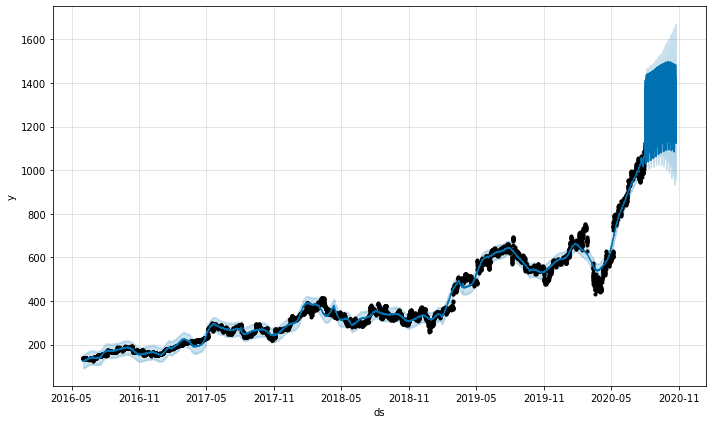

In [55]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends);


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** # The near-term forecast for the popularity of MercardoLibre is mostly at or above the most recent level. However, there is large variability in the predictions.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [58]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index(["ds"])

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[["yhat", "yhat_lower", "yhat_upper"]]


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 09:00:00,124.817260,94.215791,154.250270
2016-06-01 10:00:00,124.876210,94.947219,154.836548
2016-06-01 11:00:00,124.945479,94.995203,156.268729
2016-06-01 12:00:00,124.696850,89.972755,156.639866
2016-06-01 13:00:00,124.802981,94.928443,153.790233
...,...,...,...
2020-10-22 19:00:00,1169.349279,1008.042838,1350.239261
2020-10-22 20:00:00,1216.500533,1055.037641,1398.773991
2020-10-22 21:00:00,1280.679182,1115.178781,1459.982563


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [59]:
forecast_mercado_trends.index

DatetimeIndex(['2016-06-01 09:00:00', '2016-06-01 10:00:00',
               '2016-06-01 11:00:00', '2016-06-01 12:00:00',
               '2016-06-01 13:00:00', '2016-06-01 14:00:00',
               '2016-06-01 15:00:00', '2016-06-02 09:00:00',
               '2016-06-02 10:00:00', '2016-06-02 11:00:00',
               ...
               '2020-10-22 14:00:00', '2020-10-22 15:00:00',
               '2020-10-22 16:00:00', '2020-10-22 17:00:00',
               '2020-10-22 18:00:00', '2020-10-22 19:00:00',
               '2020-10-22 20:00:00', '2020-10-22 21:00:00',
               '2020-10-22 22:00:00', '2020-10-22 23:00:00'],
              dtype='datetime64[ns]', name='ds', length=9067, freq=None)

In [60]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[["yhat_lower", "yhat_upper", "yhat"]]                                \
.rename(columns={"yhat_lower": "Worst Case", "yhat_upper": "Best Case", "yhat": "Expected"}) \
.hvplot(
    title="MercadoLibre Predicted Traffic",
    xlabel="Date",
    ylabel="Stock Price",
)


Output hidden; open in https://colab.research.google.com to view.

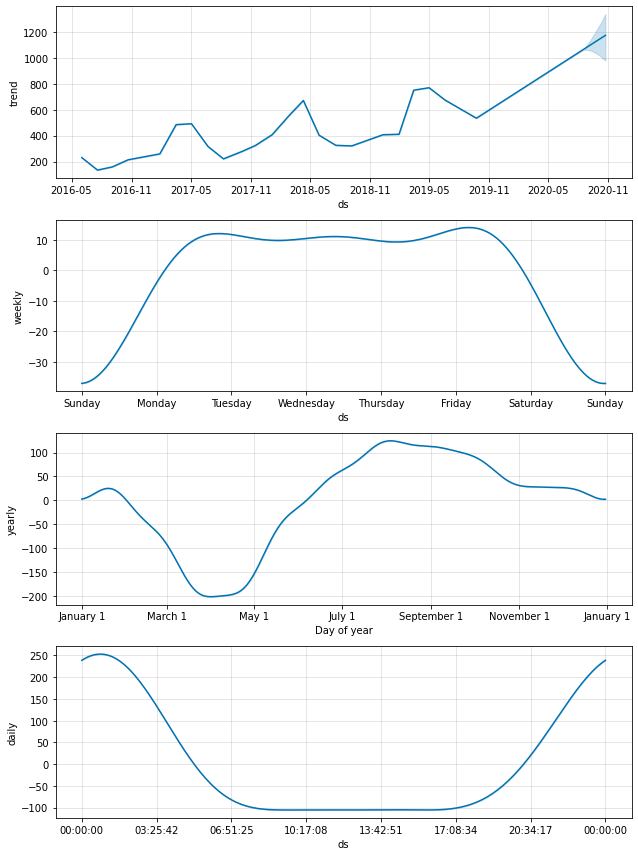

In [31]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the figures_mercado_trends DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends);


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** The greatest popularity, on a daily timeframe, is the late evening to early morning.

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** The weekdays appear to get the most search traffic.

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** April appears to be the lowest point for search traffic in the year.


## Step 5 (Optional): Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

1. Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

2. Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

3. Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.




#### Step 1: Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [32]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

df_mercado_sales = pd.read_csv(
    "mercado_daily_revenue.csv",
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True,
)

# Review the DataFrame
df_mercado_sales.head()


Saving mercado_daily_revenue.csv to mercado_daily_revenue.csv


,Daily Sales
date,
2019-01-01,0.626452
2019-01-02,1.301069
2019-01-03,1.751689
2019-01-04,3.256294
2019-01-05,3.732920


In [33]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the daily sales figures 
df_mercado_sales.hvplot(
    title="MercadoLibre Daily Revenue",
    xlabel="Date",
    ylabel="Daily Sales",
)


Output hidden; open in https://colab.research.google.com to view.

In [34]:
# Apply a Facebook Prophet model to the data.

# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales.reset_index()

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df = mercado_sales_prophet_df.rename(columns={"date":"ds", "Daily Sales":"y"})

# Visualize the DataFrame
mercado_sales_prophet_df.head()


,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920


In [35]:
# Create the model
mercado_sales_prophet_model = Prophet(daily_seasonality=True)

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [36]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=3360, freq="H")

# Display the last five rows of the future DataFrame
display(mercado_sales_prophet_future.head())
display(mercado_sales_prophet_future.tail())


,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05


,ds
3855,2020-09-30 20:00:00
3856,2020-09-30 21:00:00
3857,2020-09-30 22:00:00
3858,2020-09-30 23:00:00
3859,2020-10-01 00:00:00


In [37]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
mercado_sales_prophet_forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.525176,-1.659133,2.055078,0.525176,0.525176,-0.340885,-0.340885,-0.340885,-0.404549,-0.404549,-0.404549,0.063664,0.063664,0.063664,0.0,0.0,0.0,0.184291
1,2019-01-02,0.564464,-1.642798,2.027269,0.564464,0.564464,-0.321938,-0.321938,-0.321938,-0.404549,-0.404549,-0.404549,0.082611,0.082611,0.082611,0.0,0.0,0.0,0.242526
2,2019-01-03,0.603752,-1.636926,2.059014,0.603752,0.603752,-0.384991,-0.384991,-0.384991,-0.404549,-0.404549,-0.404549,0.019559,0.019559,0.019559,0.0,0.0,0.0,0.218761
3,2019-01-04,0.643039,-1.777788,2.153348,0.643039,0.643039,-0.462395,-0.462395,-0.462395,-0.404549,-0.404549,-0.404549,-0.057846,-0.057846,-0.057846,0.0,0.0,0.0,0.180644
4,2019-01-05,0.682327,-1.723630,2.180672,0.682327,0.682327,-0.528272,-0.528272,-0.528272,-0.404549,-0.404549,-0.404549,-0.123722,-0.123722,-0.123722,0.0,0.0,0.0,0.154056


#### Step 2: Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

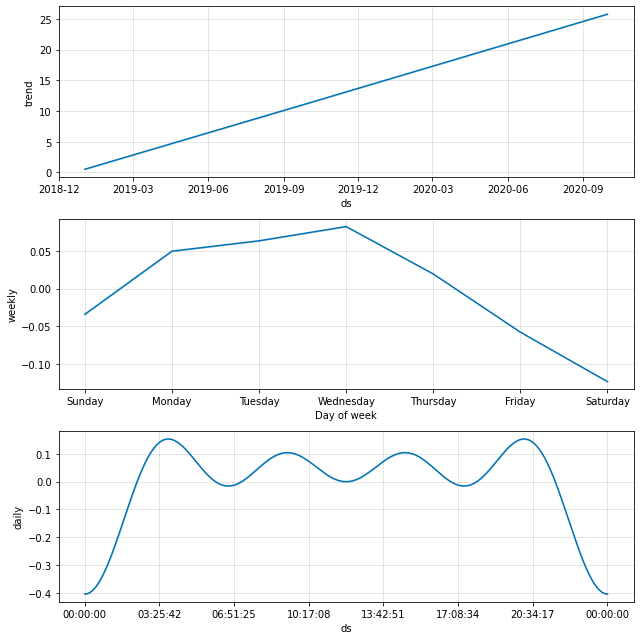

In [38]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue
mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast);


##### Answer the following question:

**Question:** For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

**Answer:** The peak revenue days, in descending order, are Wednesday, Tuesday, and Monday.

#### Step 3: Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

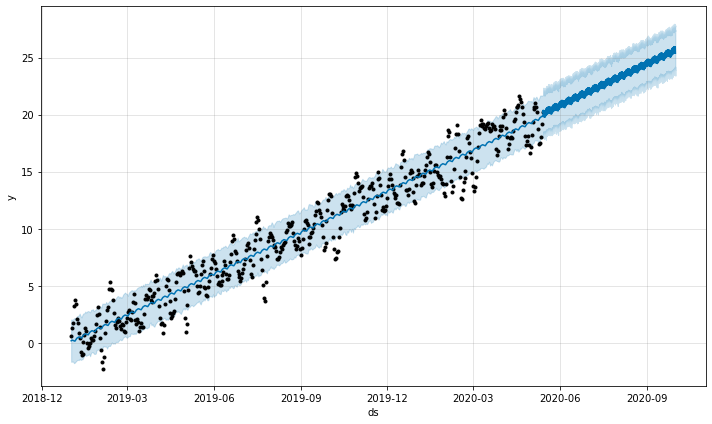

In [39]:
# Plot the predictions for the Mercado sales
mercado_sales_prophet_model.plot(mercado_sales_prophet_forecast);


In [40]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index(["ds"])

# Display the first and last five rows of the DataFrame
display(mercado_sales_prophet_forecast.head())
display(mercado_sales_prophet_forecast.tail())


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2019-01-01,0.525176,-1.659133,2.055078,0.525176,0.525176,-0.340885,-0.340885,-0.340885,-0.404549,-0.404549,-0.404549,0.063664,0.063664,0.063664,0.0,0.0,0.0,0.184291
2019-01-02,0.564464,-1.642798,2.027269,0.564464,0.564464,-0.321938,-0.321938,-0.321938,-0.404549,-0.404549,-0.404549,0.082611,0.082611,0.082611,0.0,0.0,0.0,0.242526
2019-01-03,0.603752,-1.636926,2.059014,0.603752,0.603752,-0.384991,-0.384991,-0.384991,-0.404549,-0.404549,-0.404549,0.019559,0.019559,0.019559,0.0,0.0,0.0,0.218761
2019-01-04,0.643039,-1.777788,2.153348,0.643039,0.643039,-0.462395,-0.462395,-0.462395,-0.404549,-0.404549,-0.404549,-0.057846,-0.057846,-0.057846,0.0,0.0,0.0,0.180644
2019-01-05,0.682327,-1.723630,2.180672,0.682327,0.682327,-0.528272,-0.528272,-0.528272,-0.404549,-0.404549,-0.404549,-0.123722,-0.123722,-0.123722,0.0,0.0,0.0,0.154056


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2020-09-30 20:00:00,25.755507,24.211130,27.838724,25.750945,25.760101,0.184108,0.184108,0.184108,0.151706,0.151706,0.151706,0.032402,0.032402,0.032402,0.0,0.0,0.0,25.939615
2020-09-30 21:00:00,25.757157,24.038059,27.818459,25.752592,25.761753,0.130314,0.130314,0.130314,0.101137,0.101137,0.101137,0.029177,0.029177,0.029177,0.0,0.0,0.0,25.887471
2020-09-30 22:00:00,25.758807,23.913123,27.693347,25.754240,25.763404,-0.061630,-0.061630,-0.061630,-0.087588,-0.087588,-0.087588,0.025957,0.025957,0.025957,0.0,0.0,0.0,25.697177
2020-09-30 23:00:00,25.760457,23.616997,27.332613,25.755888,25.765056,-0.284612,-0.284612,-0.284612,-0.307362,-0.307362,-0.307362,0.022750,0.022750,0.022750,0.0,0.0,0.0,25.475844
2020-10-01 00:00:00,25.762106,23.413460,27.410893,25.757536,25.766708,-0.384991,-0.384991,-0.384991,-0.404549,-0.404549,-0.404549,0.019559,0.019559,0.019559,0.0,0.0,0.0,25.377116


In [41]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast.loc["2020-07-01":"2020-09-30",
                                                                    ["yhat", "yhat_upper", "yhat_lower"]]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter.rename(
    columns={"yhat":       "Expected Sales",
             "yhat_upper": "Best Case Sales",
             "yhat_lower": "Worst Case Sales"}
)

# Review the last five rows of the DataFrame
mercado_sales_forecast_quarter.tail()


,Expected Sales,Best Case Sales,Worst Case Sales
ds,,,
2020-09-30 19:00:00,25.871842,27.715173,23.972611
2020-09-30 20:00:00,25.939615,27.838724,24.211130
2020-09-30 21:00:00,25.887471,27.818459,24.038059
2020-09-30 22:00:00,25.697177,27.693347,23.913123
2020-09-30 23:00:00,25.475844,27.332613,23.616997


In [42]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
print_summed_values_func = lambda ds, w: print(f"{ds.name+':':{w}} ${ds.sum():,.2f}")

width = max(mercado_sales_forecast_quarter.columns.map(len)) + 1
mercado_sales_forecast_quarter.apply(print_summed_values_func, w=width);


Expected Sales:   $52,860.32
Best Case Sales:  $57,064.45
Worst Case Sales: $48,656.35


### Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

**Answer:** Given the timeline of historical sales data and its trending behavior, the quarterly sales forecast is positive with a continued upward trend. However, regarding short-term trends, we do see a downward trend towards the end of the week (Thursday thru Saturday) and at late hours into the night.<br><br>
By using Prophet to analyze the daily revenue of MercadoLibre, these trends have been projected to show positive results with the expected sales at 52,860.32 USD for Q3. Also still reflecting an upward trend in Q3, the worst case sales is predicted at 48,650.62 USD.